In [1]:
from neural.containers import Sequential
from neural.losses import MSE, CE
from neural.layers import Dense, TanH, RELU, Softmax
from neural.utils.preprocessing import OneHotEncoder
import datasets.spiral_data as sd 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 

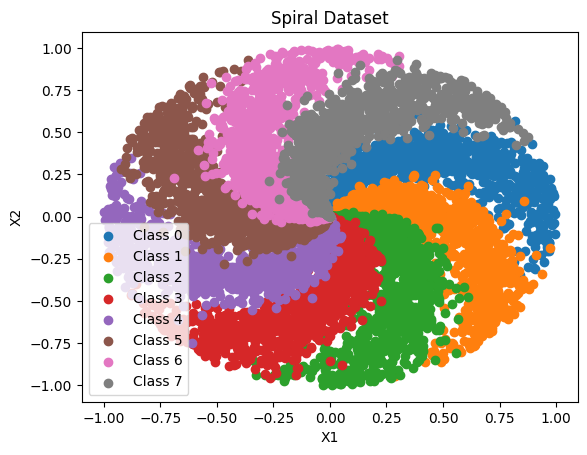

In [2]:
num_classes = 8
(x, y) = sd.generate_spiral_data(n_samples=1000, n_class=num_classes, noise=.2)
sd.plot_spiral(x,y,num_classes)

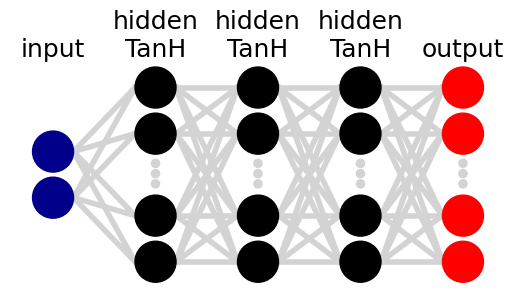

In [27]:
model = Sequential([
    Dense(2, 8),
    TanH(),
    Dense(8, 10),
    TanH(),
    Dense(10, 12),
    TanH(),
    Dense(12, num_classes),
])

model.display_network()

In [28]:
# encode the y's
encoder = OneHotEncoder()
encoder.fit(y)
y_encoded = encoder.encode(y)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=.2)

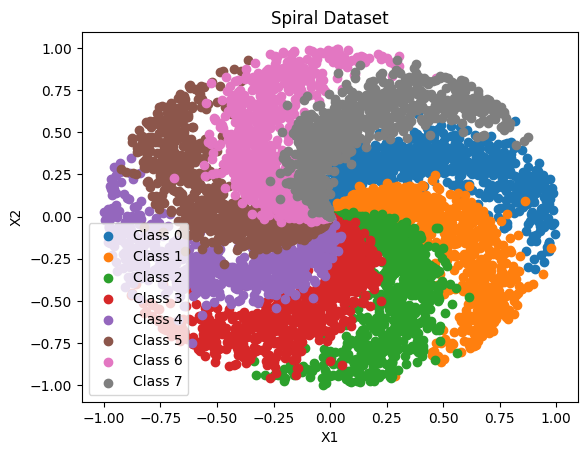

In [29]:
sd.plot_spiral(X_train, encoder.decode(y_train), num_classes=num_classes)

In [32]:
# We use MSE here instead of CE since we are predicting the logits directly w/o the use of softmax (so these are really probabilities)
hist_loss, hist_acc, hist_time = model.fit(X_train, y_train, 100, .1, MSE(), batch_size=1)

Epoch 0/100, Loss: 0.0151, Accuracy: 0.9931
Epoch 10/100, Loss: 0.0062, Accuracy: 0.9958
Epoch 20/100, Loss: 0.0052, Accuracy: 0.9964
Epoch 30/100, Loss: 0.0051, Accuracy: 0.9960
Epoch 40/100, Loss: 0.0051, Accuracy: 0.9950
Epoch 50/100, Loss: 0.0050, Accuracy: 0.9949
Epoch 60/100, Loss: 0.0051, Accuracy: 0.9947
Epoch 70/100, Loss: 0.0051, Accuracy: 0.9946
Epoch 80/100, Loss: 0.0050, Accuracy: 0.9943
Epoch 90/100, Loss: 0.0051, Accuracy: 0.9941


In [33]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_act = np.argmax(y_test, axis=1)
accuracy = sum(y_pred == y_act) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.92625


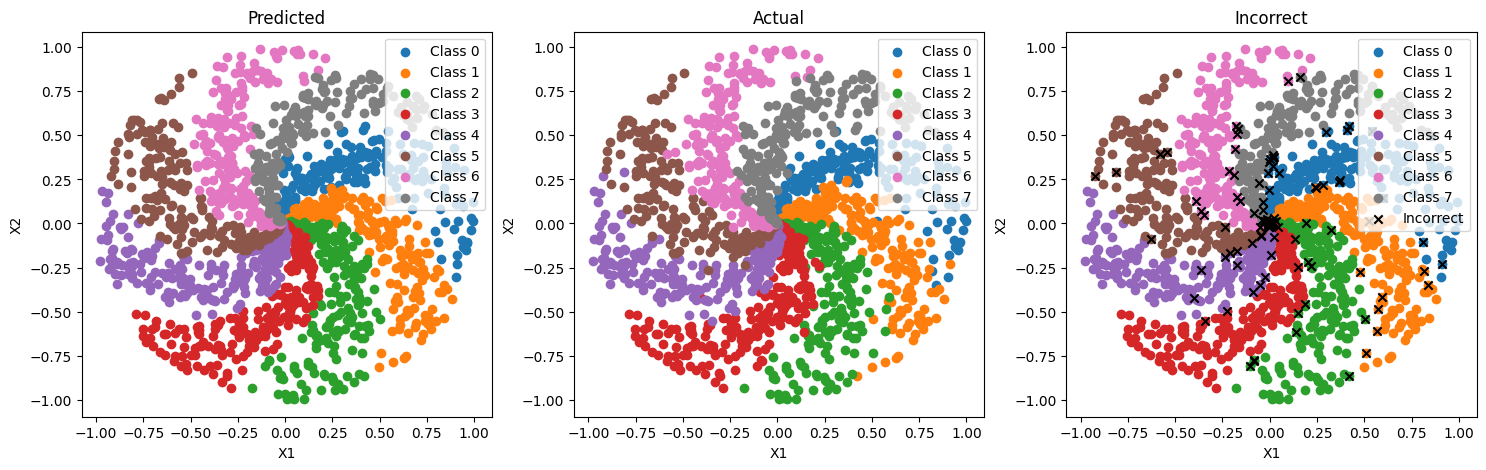

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax = ax.flatten()


sd.plot_spiral(X_test, y_pred, num_classes, title="Predicted", ax=ax[0], render=False)
sd.plot_spiral(X_test, y_act, num_classes, title="Actual", ax=ax[1], render=False)
sd.plot_spiral(X_test, y_pred, num_classes, title="Incorrect", correct=y_act, ax=ax[2], render=False)
plt.show()